In [2]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("..\data\insurance.csv")

In [4]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [6]:
df.shape

(1340, 10)

In [7]:
pd.set_option("display.float_format","{:.2f}".format)
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(1332, 10)

In [12]:
df.isna().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [13]:
df.describe(include="all")

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


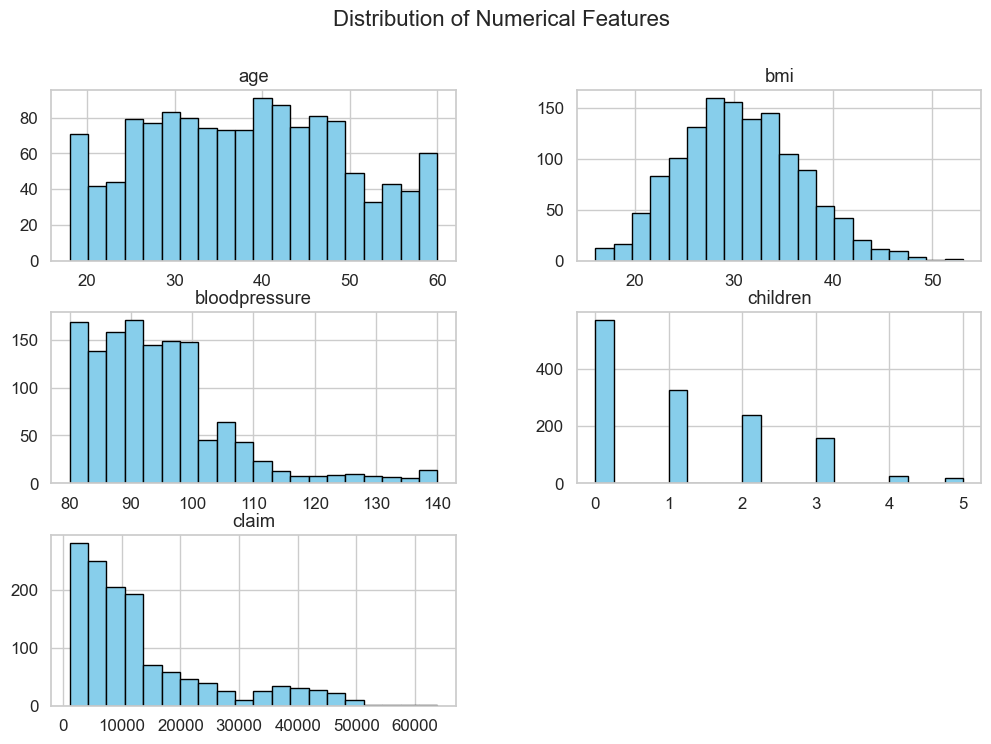

In [14]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numeric_cols].hist(bins=20, figsize=(12,8), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

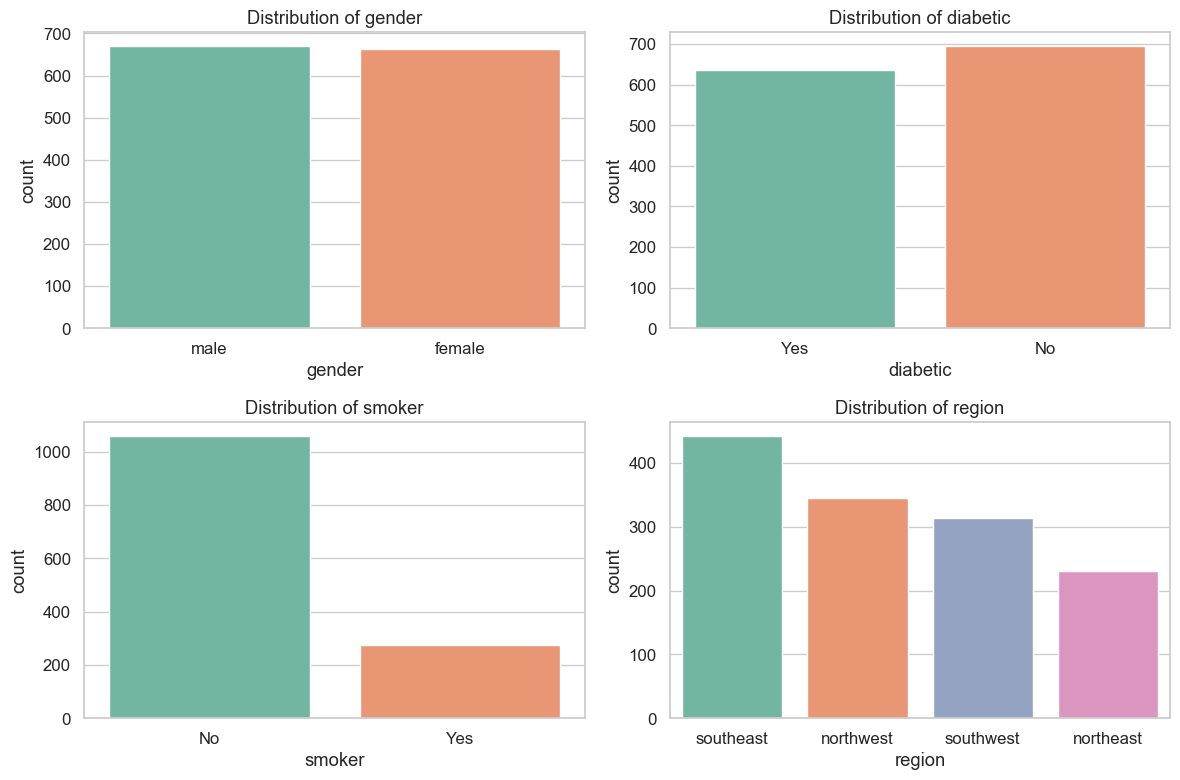

In [15]:
cat_cols = ["gender", "diabetic", "smoker", "region"]
plt.figure(figsize=(12,8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data = df, x = col)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

In [16]:
df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

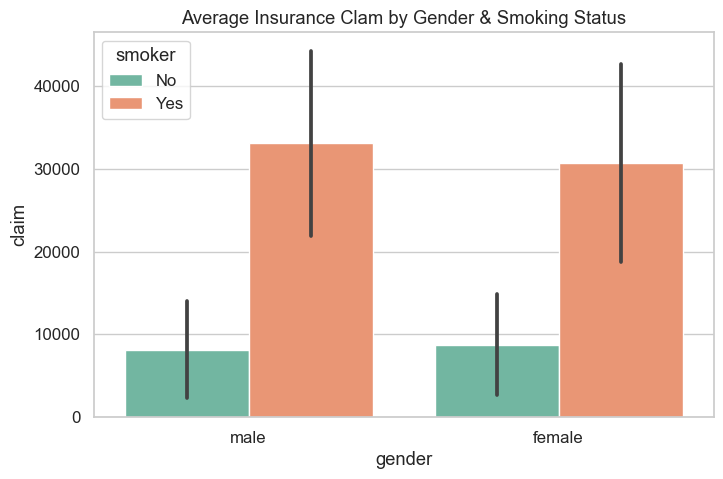

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data = df, x="gender", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Average Insurance Clam by Gender & Smoking Status")
plt.show()

# If someone is smoker they're going to pay more insurance

In [18]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


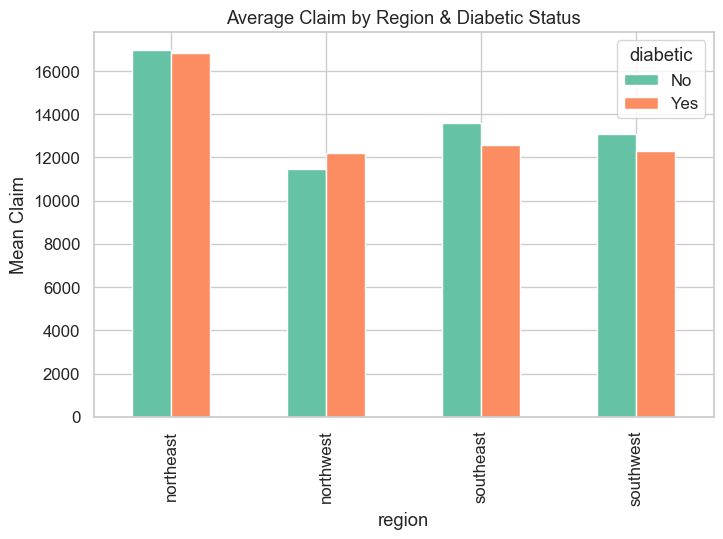

In [19]:
pivot_region_diabetic.plot(kind='bar', figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

# describe the plot:
# - without consider the region, diabetic is not effect the insurance cost
# - northeast is the leader in terms of average amount

In [20]:
pivot_table = pd.pivot_table(df, values="claim", index="region", columns="smoker", aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [21]:
pivot_table = pd.pivot_table(df, values="claim", index="children", columns="diabetic", aggfunc="mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [22]:
df[numeric_cols].corr()

,age,bmi,bloodpressure,children,claim
age,1.00,-0.04,-0.06,-0.03,-0.03
bmi,-0.04,1.00,0.14,0.01,0.20
bloodpressure,-0.06,0.14,1.00,-0.03,0.53
children,-0.03,0.01,-0.03,1.00,0.06
claim,-0.03,0.20,0.53,0.06,1.00


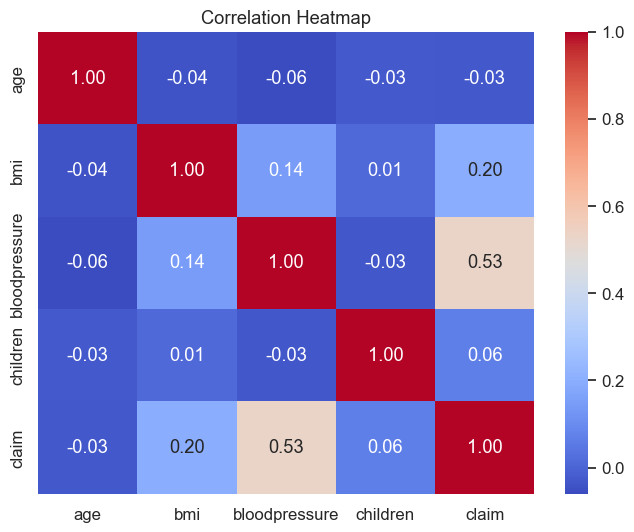

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

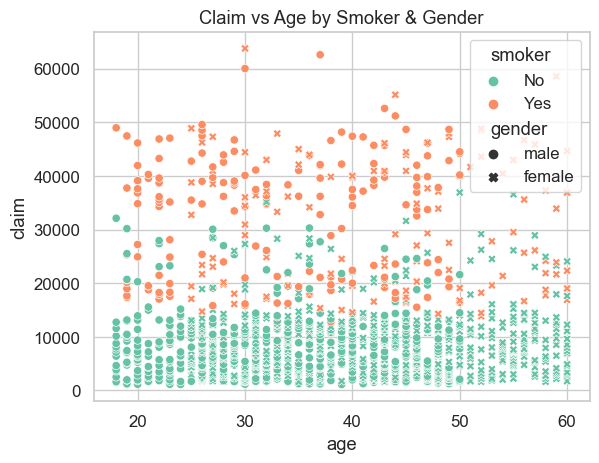

In [24]:
sns.scatterplot(data = df, x = "age", y = "claim", hue = "smoker", style="gender")
plt.title("Claim vs Age by Smoker & Gender")
plt.show()

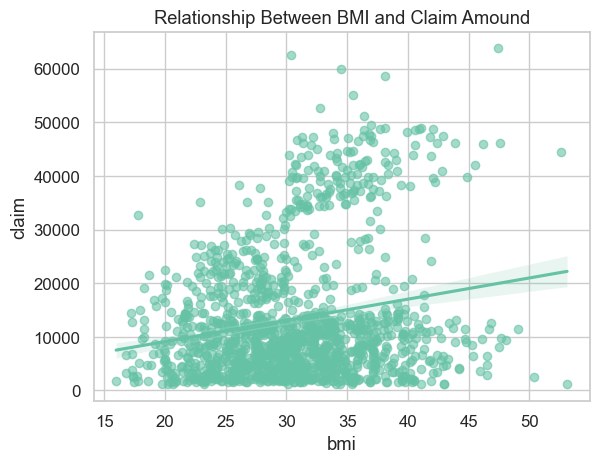

In [25]:
sns.regplot(data = df, x = 'bmi', y = 'claim', scatter_kws={"alpha":0.6})
plt.title("Relationship Between BMI and Claim Amound")
plt.show()

# When BMI increase, Insurance increase too

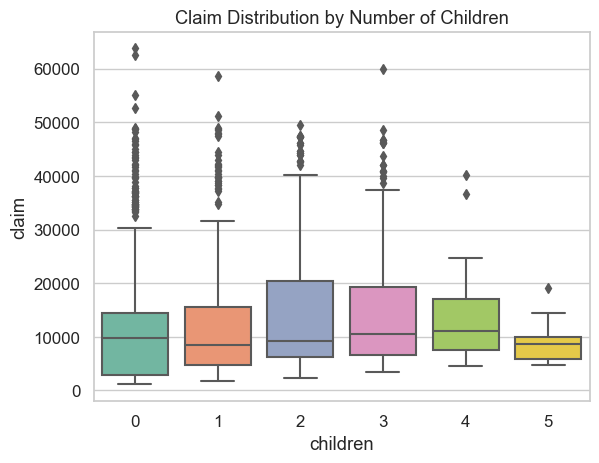

In [26]:
sns.boxplot(data = df, x = 'children', y='claim')
plt.title("Claim Distribution by Number of Children")
plt.show()

# Chilren count of 2 or 3, then whe have the higher insurance  

In [27]:
df["age_group"] = pd.cut(df["age"], bins=[0,18,30,45,60,100], labels=["<18", "18-30","31-45","46-60","60+"])

In [28]:
df["age_group"].value_counts()

31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: age_group, dtype: int64

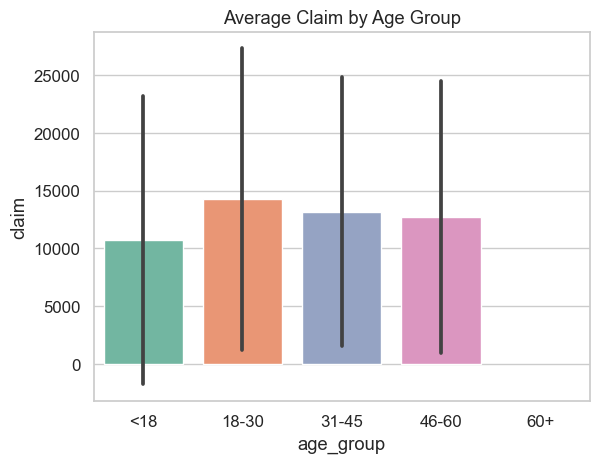

In [29]:
sns.barplot(data=df, x="age_group", y="claim", estimator="mean", errorbar="sd")
plt.title("Average Claim by Age Group")
plt.show()

In [30]:
df["bmi_category"] = pd.cut(df["bmi"], bins=(0, 18.5, 24.9, 29.9, 100), labels=["Underweight", "Normal", "Overweight", "Obese"])

In [31]:
df["bmi_category"].value_counts()

Obese          702
Overweight     387
Normal         222
Underweight     21
Name: bmi_category, dtype: int64

In [32]:
import warnings
warnings.filterwarnings("ignore")

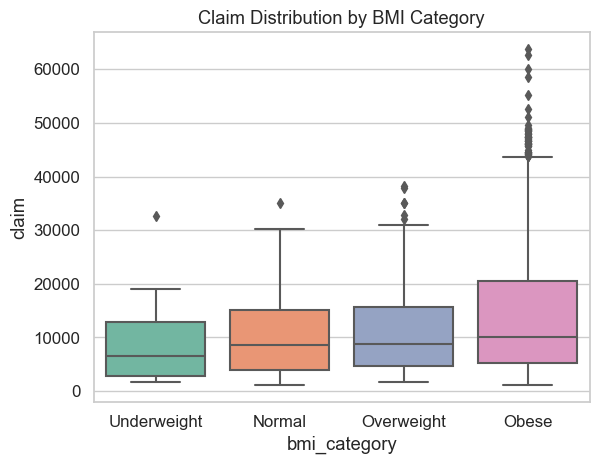

In [33]:
sns.boxplot(data = df, x="bmi_category", y="claim")
plt.title("Claim Distribution by BMI Category")
plt.show()

# If someone is obese and smoker as well, they're going to pay more insurance

In [34]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()

In [35]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


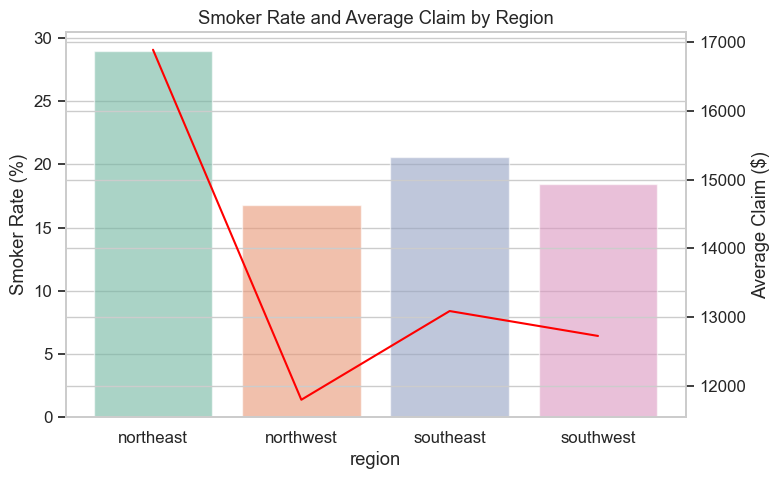

In [36]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data = region_stats, x="region", y="smoker_rate", ax=ax1, alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(data = region_stats, x='region', y='mean_claim', ax=ax2, color='red', markers='o')

ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate and Average Claim by Region")
plt.show()
